**DeepVision Challenge**

**1)** Implementar el algoritmo greedy (estándar) de NMS, asumiendo que:

*los bounding boxes (BB) son representados por las tuplas (x, y, w, h), en donde:

    *(x, y) son las coordenadas de la esquina superior derecha y 
    *(w, h) el ancho y alto de la BB en cuestión. 
    
*Asumir coordenadas enteras. 

**Importar librerías útiles**

In [1]:
!pip install NMS

In [2]:
import os, json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

**Obtención de los bounding boxes**

-Imput: Imagen con un archivo .json con bounding boxes (algunos superpuestos)

-Output: La imagen con los bounding boxes filtrados


In [3]:
# Obtengo un array numpy de bounding boxes(bb)
def json_to_array(json_path):
    with open('source/apple.json') as json_file:
        data = json.load(json_file)
    bb_array = np.empty((0, 5), int)
    for line in data:
        bb_array = np.vstack((np.array(list(line.values())),bb_array))

    return bb_array

**Dibujo los bounding boxes sobre la imagen**

In [4]:
def draw_image_rect(image_path, rects):
    im = np.array(Image.open(image_path), dtype=np.uint8)
    fig, ax = plt.subplots(1)
    ax.imshow(im)
    for rect in rects:
        draw_rect = patches.Rectangle((rect[1], rect[0]), rect[2], rect[3],
                                      linewidth=3, edgecolor='b', facecolor='none')
        ax.add_patch(draw_rect)
    plt.show()

**Implementación del algoritmo greedy (estándar) de NMS**

-Con un np array de bounding boxes(bb) con sus "scores" y un "threshold" definido,

-Retorno los bounding boxes reducidos con el algoritmo greedy de NMS.

In [5]:
def nms(bb, threshold):
    
    # A) Obtengo el bb con el máximo score:
         # 1) Lo agrego a la lista de detecciones finales y,
    bb = bb[bb[:, 4].argsort()][::-1]
    bb_filtered = np.empty((0, 5), int)
    
         # 2) Lo remuevo del array original de bb
    while (len(bb) != 0):
        bb_temp = bb[0]
        bb = np.delete(bb, 0, 0)

    # B) Remuevo del array de bb a todos aquellos cuya intersección (IOU) sea mayor al "threshold"
        iou = calc_iou(bb, bb_temp)
        bb = np.delete(bb, np.argwhere(iou > threshold), 0)
        bb_filtered = np.append(bb_filtered, [bb_temp], axis=0)

    return bb_filtered

In [6]:
# Obtención del IOU (Intersection over Union)
def calc_iou(bb, bb_temp):
    x1 = bb[:, 1]
    y1 = bb[:, 0]
    x2 = bb[:, 1] + bb[:, 2]
    y2 = bb[:, 0] + bb[:, 3]

    inter = (np.minimum(x2, (bb_temp[1] + bb_temp[2])) - np.maximum(x1, bb_temp[1])) * (np.minimum(y2, (bb_temp[0] + bb_temp[3])) - np.maximum(y1, bb_temp[0]))
    union = bb[:, 2] * bb[:, 3] + bb_temp[2] * bb_temp[3] - inter
    iou = inter / union

    return iou

**Test**

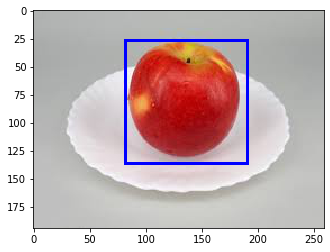

In [8]:
draw_image_rect('source/apple.jpeg', nms(json_to_array('source/apple.json'), 0.5))

**2-** ¿Cuál es la ventaja de soft-nms sobre NMS estándar? 

**NMS:**

-Selecciona el bounding box con mayor score (M) y suprime los bounding box cuya sobreposicion con el M sea significativa. Para ello genera una lista de bounding boxes (bb) a partir de los cuales elije uno, teniendo en cuenta el score de los mismos. 

**Soft-NMS:** 

-Por su parte no elimina ningun objeto ya que toma los scores de deteccion de los objetos superpuestos con M, como funciones continuas. De todos modos su confianza es menor.
-Es de facil implementación.
-Es muy sencillo de integrarlo a cualquier pipeline de deteccion de objetos.